# RwHealth: Data Science Assessment 

**Tasks:**

Using the `heart` dataset, build 3 machine learning models to predict the presence of heart disease. These models will be binary classification models. Evaluate each model, and determine which of the models is best. You must build a decision tree, random forest and a Naive Bayes model. 

**Dataset:**

Throughout this notebook, you will be using the open source heart disease dataset, published [here](https://www.kaggle.com/ronitf/heart-disease-uci).



# Getting Started

First of all, we will load the dataset.

In [3]:
!pip install opendatasets

     |████████████████████████████████| 58 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 9.2 MB/s  eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=e784661dd591146a0b8f21b3afed04f6d6698172291475ca5d9910758802f5dc
  Stored in directory: /Users/esmasert/Library/Caches/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [4]:
import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/ronitf/heart-disease-uci")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: esssss2364
Your Kaggle Key: ········


100%|██████████| 3.40k/3.40k [00:00<00:00, 1.78MB/s]

# Data Preparation

## Load in data

Read in the `heart` dataset. 

This dataset has the following columns:

**Continuous numerical columns**
- `age`: age in years
- `trestbps`: resting blood pressure
- `chol`: serum cholestoral in mg/dl
- `thalach`: maximum heart rate achieved
- `oldpeak`: ST depression induced by exercise relative to rest

**Categorical columns**
- `sex`: 1 = male; 0 = female
- `cp`: chest pain type (4 values)
- `fbs`: fasting blood sugar > 120 mg/dl. 1 = true; 0 = false
- `restecg`: resting electrocardiographic results (values 0,1,2)
- `exang`: exercise induced angina, 1 = yes; 0 = no
- `slope`: the slope of the peak exercise ST segment (3 values)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: thalassemia, 1 = normal; 2 = fixed defect; 3 = reversable defect
- `target`: presence of heart disease. 0 = positive, 1 = negative

Empty cells are read in as `NA`. 

This dataset contains a column `target` which is a binary flag indicating the presence of heart disease. This is the target column we wish to predict. 

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import missingno
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [171]:
# Reading Data:
df=pd.read_csv("/Users/esmasert/Desktop/CODES/Jupyter/DataAssessment/heart-disease-uci/heart.csv")
df.head()  # Showing the First Five Rows:

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [172]:
df.tail()  # Showing the Last Five Rows:

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [173]:
# Printing Dimensions Of The Data:
print(f'The Data Contains {df.shape[0]} Rows and {df.shape[1]} Columns')

The Data Contains 303 Rows and 14 Columns


In [174]:
df.columns # Column Names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [175]:
df.info() # Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [176]:
df.dtypes   # Data Types

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

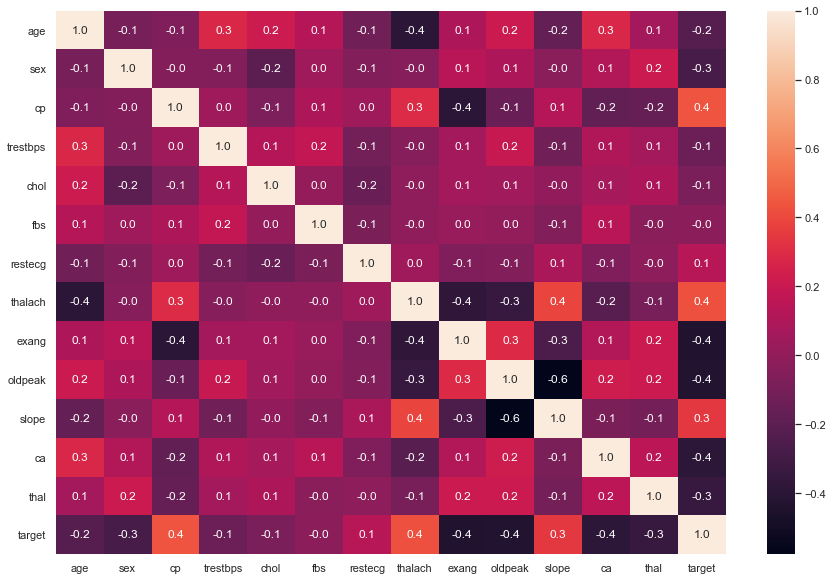

In [177]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [178]:
# To see if there is any missing value in the rows by looping through all columns. 
# And if there is, what's the percentage of it?

for clmn in df.columns:
    any_missing = df[clmn].isnull().sum()
    print(f'{clmn} - {any_missing :.1%}')

age - 0.0%
sex - 0.0%
cp - 0.0%
trestbps - 0.0%
chol - 0.0%
fbs - 0.0%
restecg - 0.0%
thalach - 0.0%
exang - 0.0%
oldpeak - 0.0%
slope - 0.0%
ca - 0.0%
thal - 0.0%
target - 0.0%


In [179]:
df.isnull().sum()  # The missing values in whole data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Great! There is no missing value.**

In [180]:
df.duplicated().sum() # Counting the duplicated rows

1

**There is a duplicated row in the data. Now, we have to deal with it to prevent any negative side effects for training part. Because, redundancies can adversely affect analysis of data, since they are values which aren’t exactly needed.**

In [181]:
print('Number of rows :',df.shape[0], ', Number of columns :',df.shape[1])

Number of rows : 303 , Number of columns : 14


In [182]:
df.drop_duplicates(inplace=True)  #Now deleting the duplicated rows, 
# We are directly removing the row from data without copying it (inplace=True)

print('Number of rows are :',df.shape[0], ', and number of columns are :',df.shape[1])

Number of rows are : 302 , and number of columns are : 14


**Looks fine now**

In [183]:
df.duplicated().sum() # Again checking the duplicates in data

0

**Great!**

In [184]:
df.describe().T  #Transposing the columns and indexes for the better visualisation

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


**Now to understand the data better, we can list the unique values of each features.**

In [185]:
listOfCols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

for clmn in listOfCols: 
    print('{} :{} ' . format(clmn.upper(),df[clmn].unique()))

AGE :[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 
SEX :[1 0] 
CP :[3 2 1 0] 
TRESTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
FBS :

**Now we are all done with the numerical visualisations, Now let's use graphs!**

Number of people identified as sex 0 are 96 and Number of people identified as sex 1 are 206


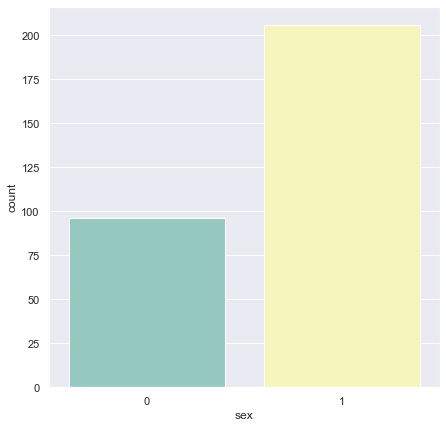

In [186]:
print(f'Number of people identified as sex 0 are {df.sex.value_counts()[0]} and Number of people identified as sex 1 are {df.sex.value_counts()[1]}')
plt.figure(figsize=(7,7))
p = sns.set_theme(style="darkgrid")
p = sns.countplot(data=df, x="sex", palette='Set3')


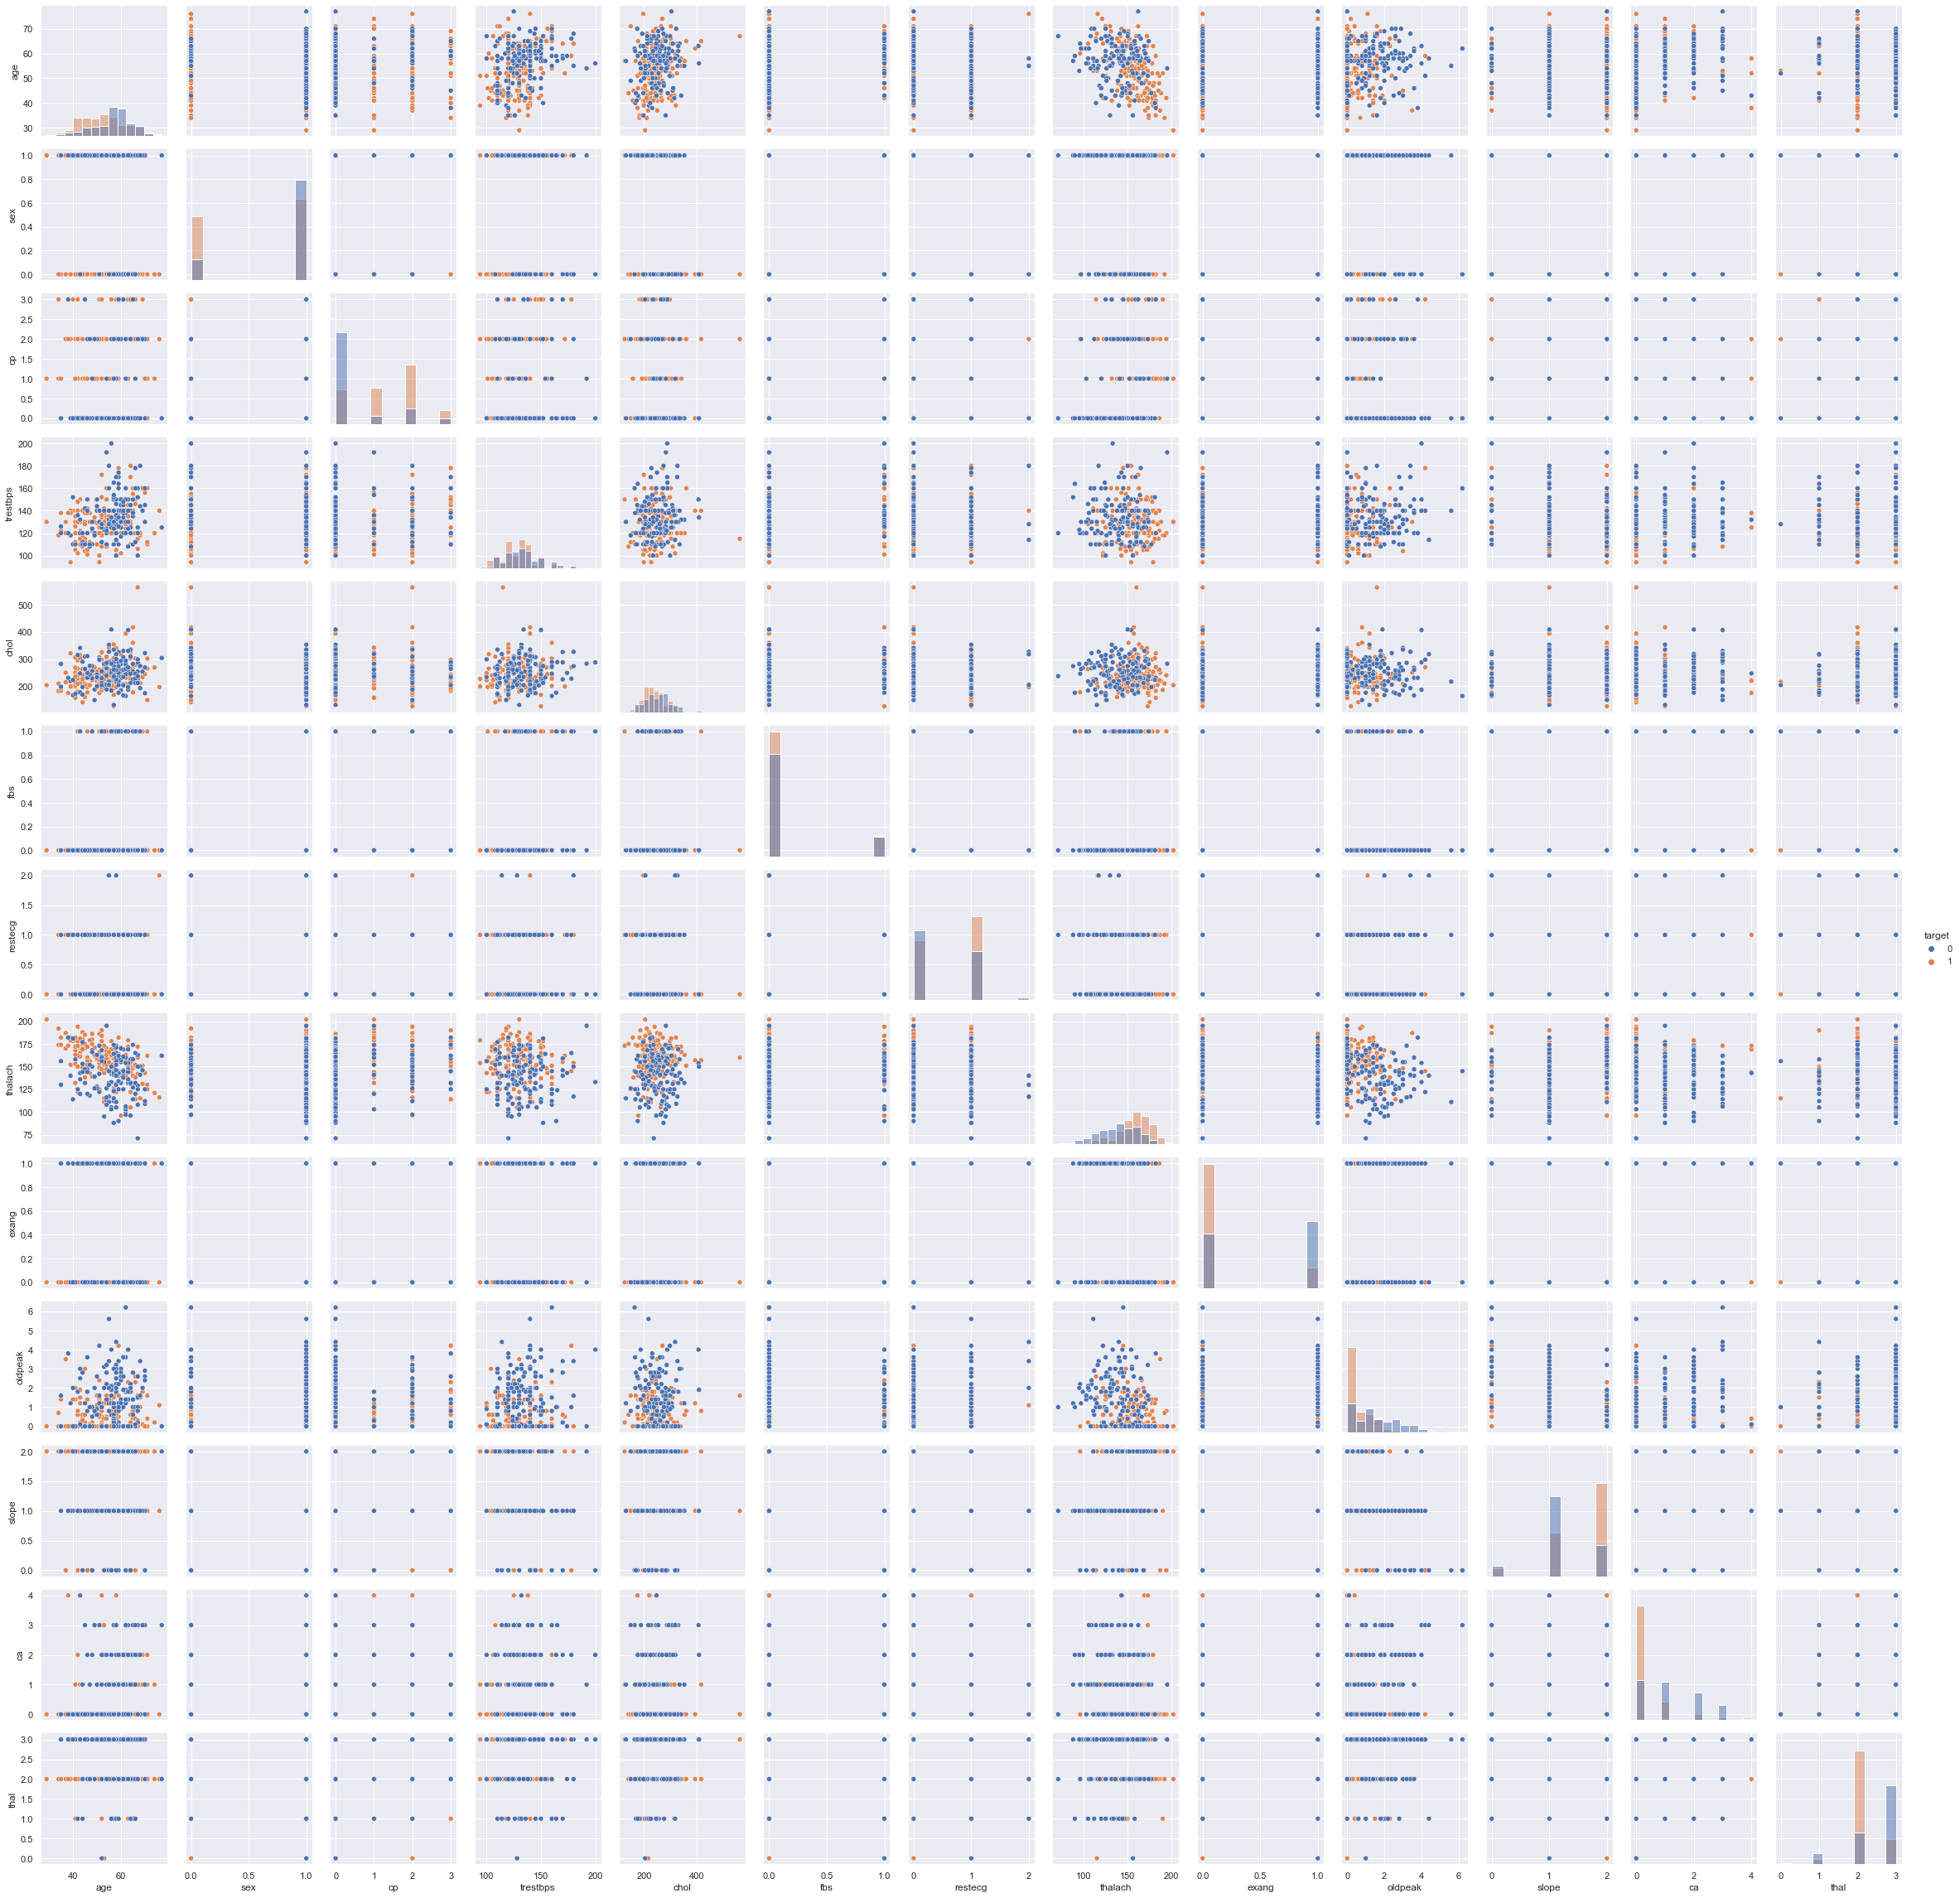

In [187]:
g = sns.PairGrid(df, hue="target")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

**Now let's see the how many people are there within the same ages and genders**

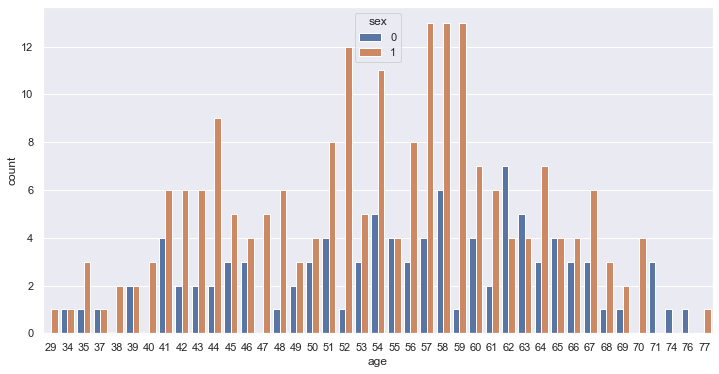

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(12,6))
 
# count plot on two categorical variable
sns.countplot(x ='age', hue = "sex", data = df)
 
# Show the plot
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

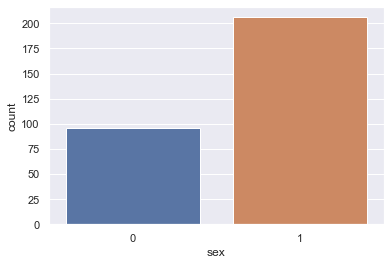

In [189]:
sns.countplot(x ='sex', data = df)  # Counting female and male numbers

**As we see, we have much more information from males in data. (1 = male; 0 = female)**

<AxesSubplot:xlabel='target', ylabel='count'>

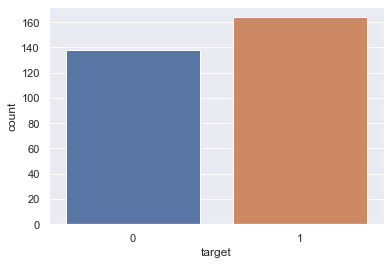

In [190]:
sns.countplot(x ='target', data = df)  # Counting target numbers

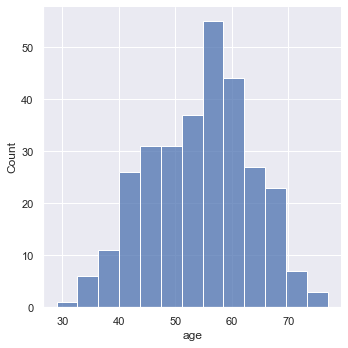

In [191]:
sns.displot(df["age"])

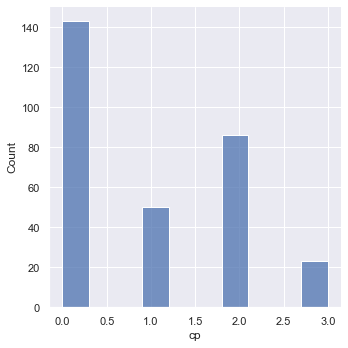

In [192]:
sns.displot(df["cp"])

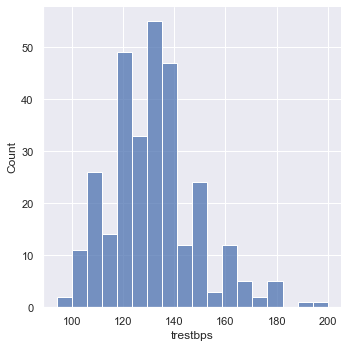

In [193]:
sns.displot(df["trestbps"])

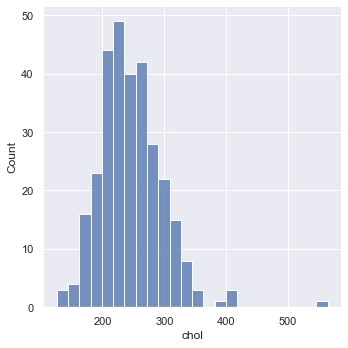

In [194]:
sns.displot(df["chol"])

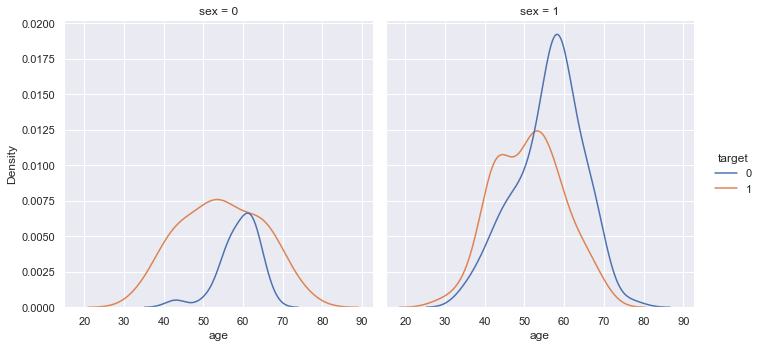

In [195]:
sns.displot(data=df, x="age", hue="target", col="sex", kind="kde") 
# Comparing the genders and target according to age

**There are more presence of heart disease for males. (Target; 0 = positive, 1 = negative) (Sex; 1 = male; 0 = female)**

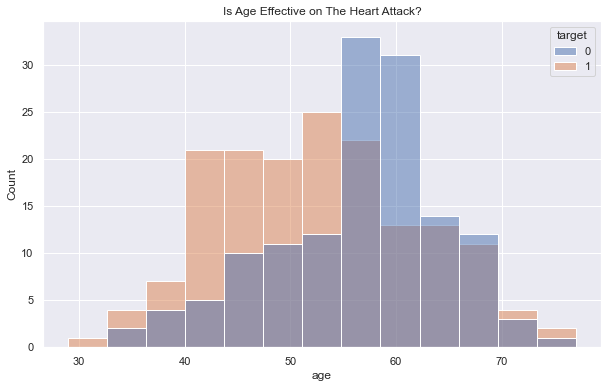

In [196]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'age', hue = 'target')
plt.title("Is Age Effective on The Heart Attack?")
plt.show()

**Between ages of 55 and 63, there are much more risk of heart attack. (Target; presence of heart disease. 0 = positive, 1 = negative)**

**Presenting graphs of continuous numerical columns with Age**

In [197]:
graphh=pd.crosstab(df["age"],df["target"]).reset_index()

graphh.columns=["age","high_risk","low_risk"]

px.line(graphh,graphh["age"],graphh["high_risk"],title="Risk of High Heart-Attack with Age")

In [198]:
px.line(graphh,graphh["age"],graphh["low_risk"],title="Risk of Low Heart-Attack with Age")

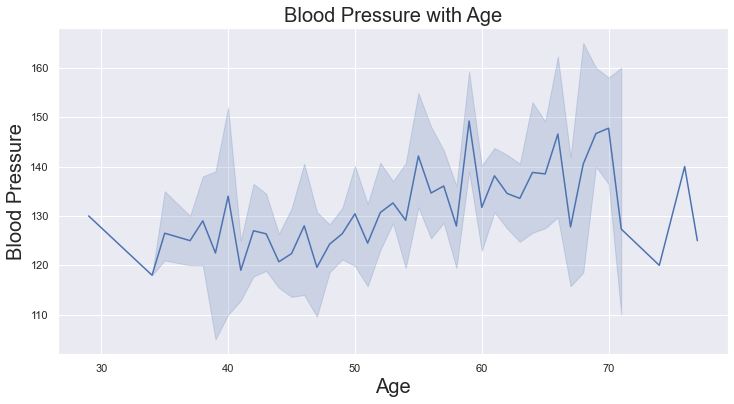

In [199]:
plt.figure(figsize=(12,6))
sns.lineplot(x="age",y="trestbps",data=df)
plt.title("Blood Pressure with Age",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Blood Pressure",fontsize=20)
plt.show()

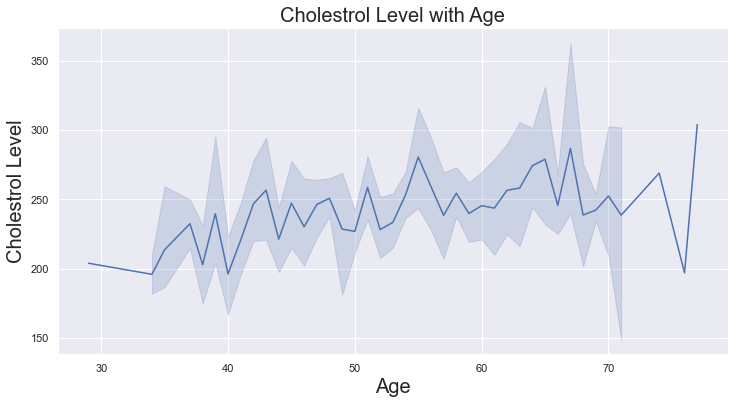

In [200]:
plt.figure(figsize=(12,6))
sns.lineplot(x="age",y="chol",data=df)
plt.title("Cholestrol Level with Age",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Cholestrol Level",fontsize=20)
plt.show()

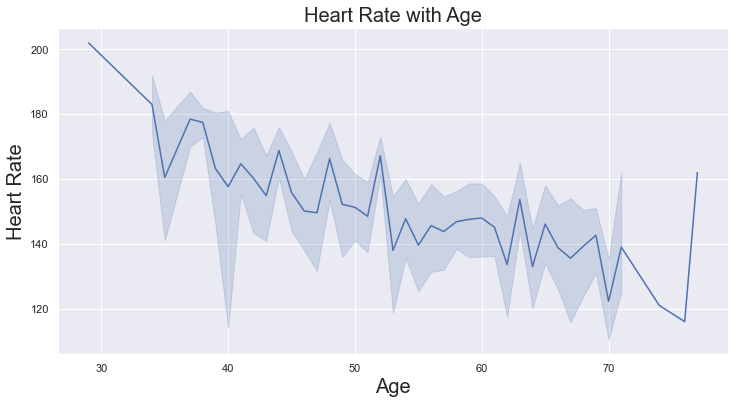

In [201]:
plt.figure(figsize=(12,6))
sns.lineplot(x="age",y="thalach",data=df)
plt.title("Heart Rate with Age",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Heart Rate",fontsize=20)
plt.show()

**Presenting graphs of continuous numerical columns with Target**

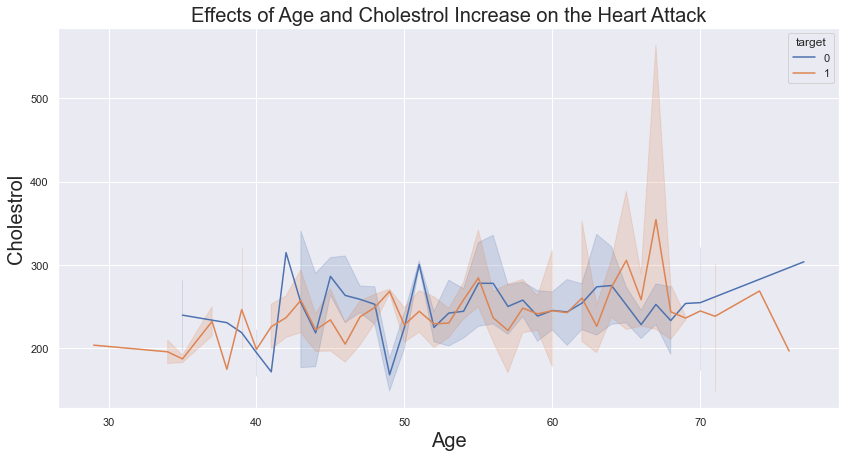

In [202]:
plt.figure(figsize=(14,7))
sns.lineplot(x="age",y="chol",hue='target',data=df)
plt.title("Effects of Age and Cholestrol Increase on the Heart Attack",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Cholestrol",fontsize=20)
plt.show()

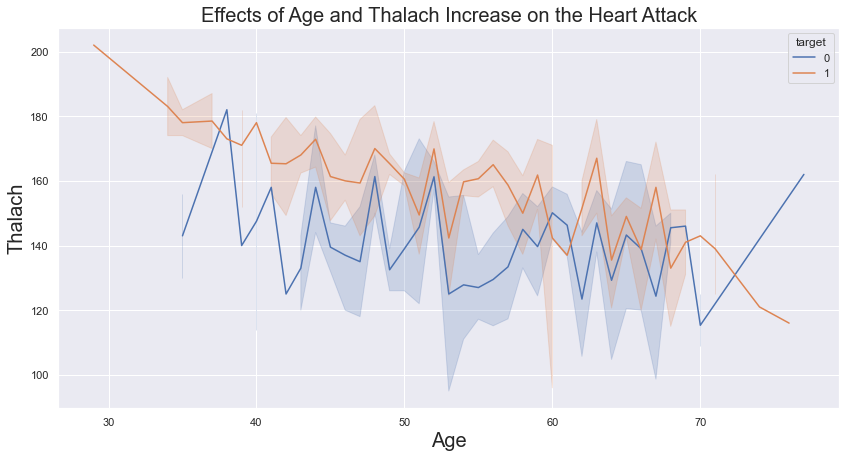

In [203]:
plt.figure(figsize=(14,7))
sns.lineplot(x="age",y="thalach",hue="target",data=df)
plt.title("Effects of Age and Thalach Increase on the Heart Attack",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Thalach",fontsize=20)
plt.show()

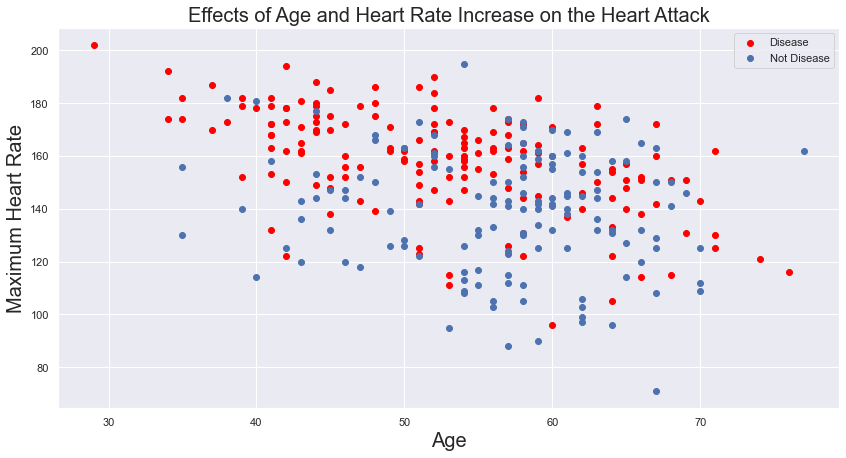

In [204]:
plt.figure(figsize=(14,7))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.title("Effects of Age and Heart Rate Increase on the Heart Attack",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Maximum Heart Rate",fontsize=20)
plt.show()

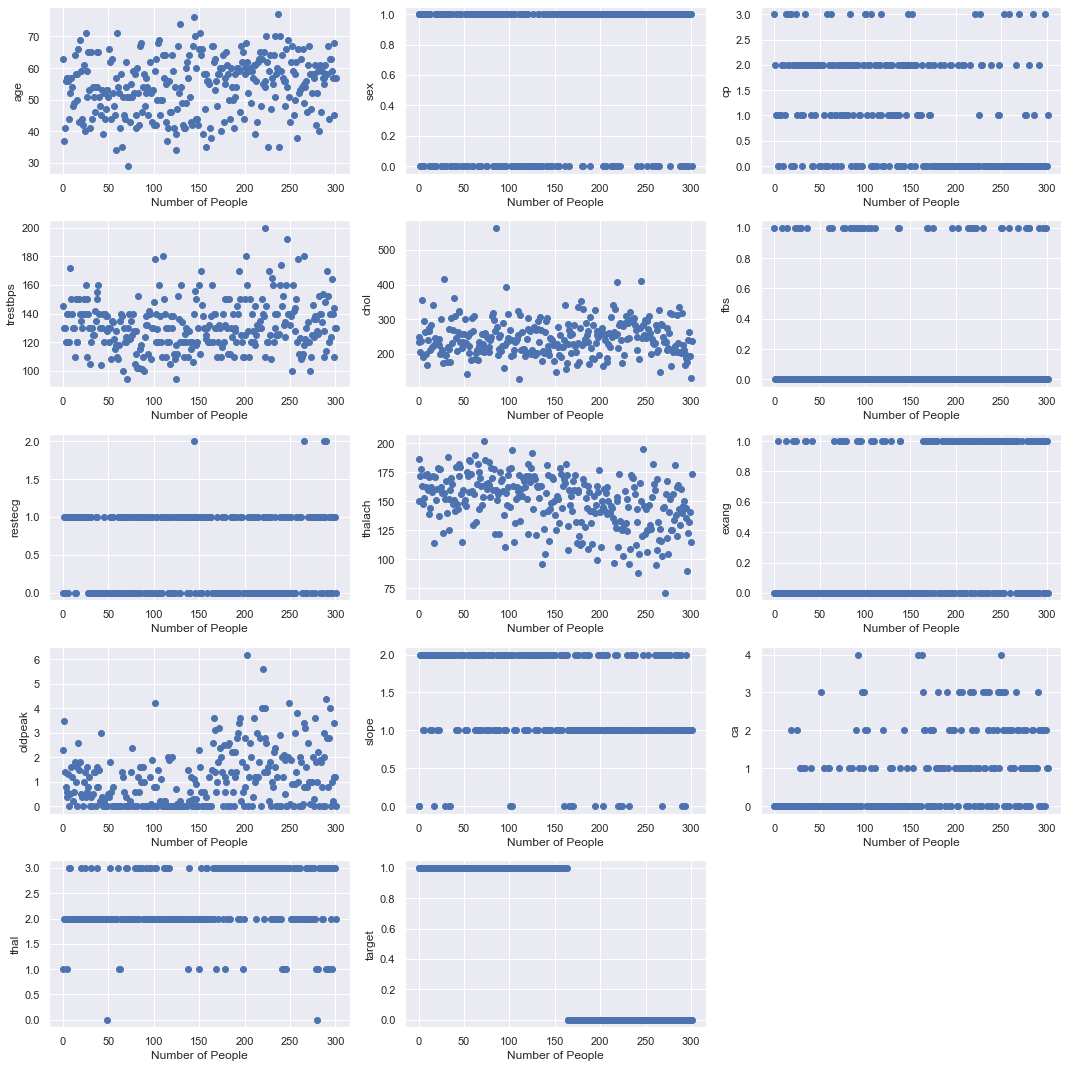

In [205]:
for i,col in enumerate(df.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(302)],df[col].values.tolist())
    plt.ylabel(col)
    plt.xlabel('Number of People')
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(15,15)
    plt.tight_layout()
plt.show()

# Model

## Preparing the data

**Feature Selection**

At first, we need to divide given columns into two types of variables; independent(feature variables) and dependent(target variable) variables.

**Splitting Data**

Then we will divide the dataset into a training set and a test set by splitting our data by 80% as training and 20% as testing.

In [206]:
from sklearn.model_selection import train_test_split # to split the data

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], 
                                                    test_size = .2, random_state=10) #split the data

In [207]:
len(X_train)

241

In [208]:
len(X_test)

61

## Decision Tree Classification

Now, creating a Decision Tree Model using Scikit-learn.

In [209]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # importing Decision Tree Classifier
from sklearn import metrics # metrics module for accuracy calculation

In [210]:
# Create Decision Tree Classifer object
clfDT = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfDT = clfDT.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clfDT.predict(X_test)

In [211]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

**Evaluating Model**

In [212]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7049180327868853


**Drawing the Decision Tree**

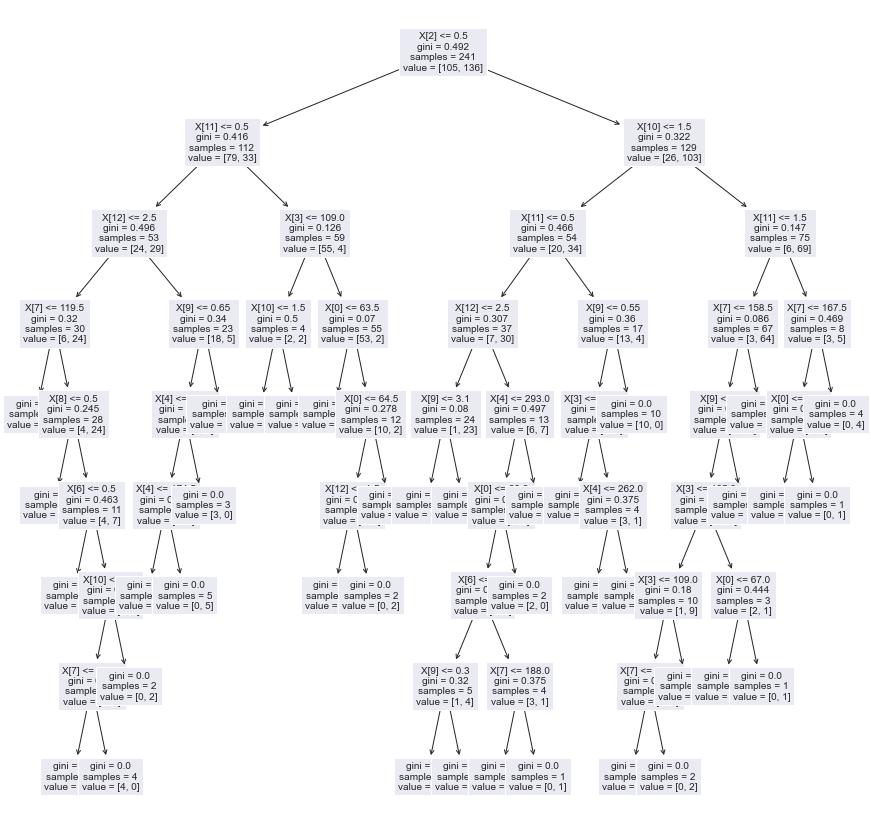

In [213]:
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(clfDT, fontsize=10)
plt.show()


**Confusion Matrix**

Accuracy: 0.7049180327868853


Confusion matrix for Decision Tree, without normalization
[[21 12]
 [ 6 22]]
Normalized confusion matrix for Decision Tree
[[0.63636364 0.36363636]
 [0.21428571 0.78571429]]


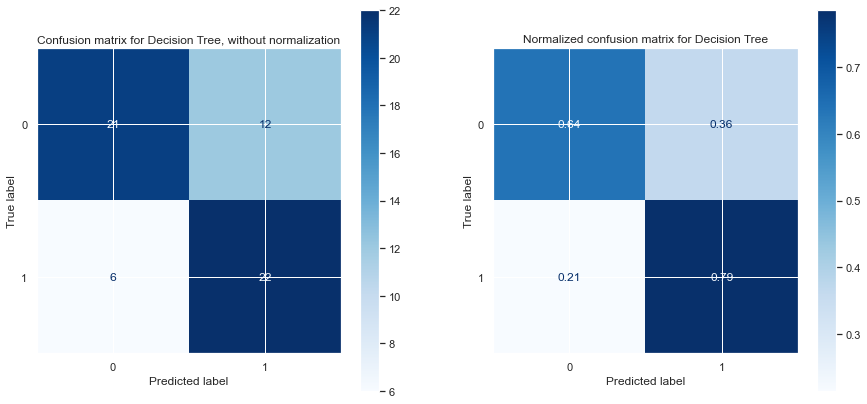

In [214]:
# Print Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')

from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

titles_options = [("Confusion matrix for Decision Tree, without normalization", None, axes.flatten()[0]),
                  ("Normalized confusion matrix for Decision Tree", 'true', axes.flatten()[1])]

for title, normalize, ax in titles_options:
    
    disp = plot_confusion_matrix(clfDT, X_test, y_test, cmap=plt.cm.Blues, ax=ax, normalize = normalize)
    
    disp.ax_.set_title(title)
    
    plt.rcParams['axes.grid'] = False

    print(title)
    print(disp.confusion_matrix)

plt.show()

**If we normalized the data**

In [215]:
b = df.target.values
a_data = df.drop(['target'], axis = 1)

# Normalize
a = (a_data - np.min(a_data)) / (np.max(a_data) - np.min(a_data)).values

In [216]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state=0)

In [217]:
# Create Decision Tree classifer object
clfNorm = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfNorm = clfNorm.fit(a_train,b_train)

#Predict the response for test dataset
b_pred = clfNorm.predict(a_test)

In [218]:
b_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [219]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(b_test, b_pred))

Accuracy: 0.7868852459016393


**Great! As you see here, we can increase the accuracy by normalizing the data before training.**

Changing the classifier criterion, to see is it effective

With normal data

In [220]:
# Create Decision Tree classifer object
clfEnt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clfEnt = clfEnt.fit(X_train, y_train)

#Predict the response for test dataset
y_predEnt = clfEnt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predEnt))

Accuracy: 0.7868852459016393


With normalized data

In [221]:
# Create Decision Tree classifer object
clfEnt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clfEnt = clfEnt.fit(a_train,b_train)

#Predict the response for test dataset
y_predEnt = clfEnt.predict(a_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(b_test, y_predEnt))

Accuracy: 0.7704918032786885


**Outcome**

Well, it increased the accuracy of the model trained with non-normalized data. And the result is as same as with the model's accuracy of trained with normalized data. 

However, 'entropy' criterion has decreased the accuracy of the model trained with normalized data. Therefore, we can not say that entropy criterion has always positive impact.

### Creating the Tables

I am including just the Gini criterion, since Entropy criterion doesn't have constant effect.

In [222]:
from sklearn.metrics import accuracy_score, classification_report

In [223]:
test_score = accuracy_score(y_test, clfDT.predict(X_test)) * 100
train_score = accuracy_score(y_train, clfDT.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.0,70.491803


In [224]:
test_score = accuracy_score(b_test, clfNorm.predict(a_test)) * 100
train_score = accuracy_score(b_train, clfNorm.predict(a_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier with Normalized Data", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.0,70.491803
1,Decision Tree Classifier with Normalized Data,100.0,78.688525


## Random Forest Classification

The Random Forest algorithm is an Ensemble Averaging Algorithms based on randomized decision trees.

In [225]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [226]:
#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(X_train,y_train)

y_pred=clfRF.predict(X_test)

In [227]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

**Evaluating Model**

In [228]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7704918032786885


**Confusion Matrix**

Accuracy: 0.7704918032786885


Confusion matrix for Random Forest, without normalization
[[22 11]
 [ 3 25]]
Normalized confusion matrix for Random Forest
[[0.66666667 0.33333333]
 [0.10714286 0.89285714]]


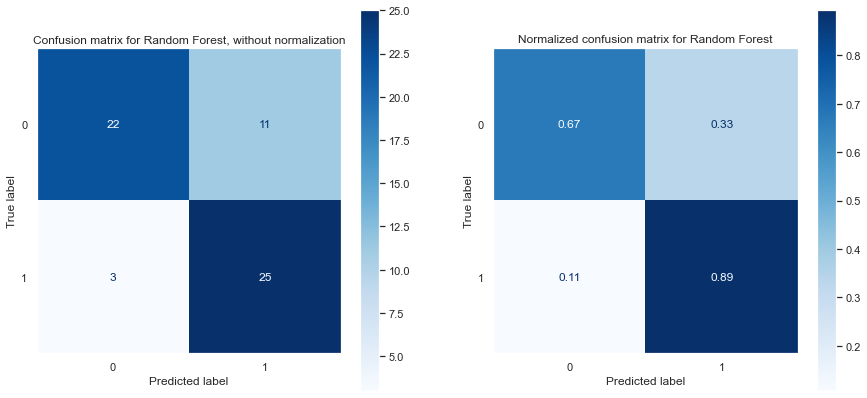

In [229]:
# Print Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')

from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
plt.rcParams['axes.grid'] = False

titles_options = [("Confusion matrix for Random Forest, without normalization", None, axes.flatten()[0]),
                  ("Normalized confusion matrix for Random Forest", 'true', axes.flatten()[1])]

for title, normalize, ax in titles_options:
    
    disp = plot_confusion_matrix(clfRF, X_test, y_test, cmap=plt.cm.Blues, ax=ax, normalize = normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

**If we train model with the normalized data**

In [295]:
#Create a Gaussian Classifier
clfRFNorm=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRFNorm.fit(a_train,b_train)

b_predNorm=clfRFNorm.predict(a_test)

In [296]:
b_predNorm

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [297]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(b_test, b_predNorm))

Accuracy: 0.8524590163934426


**Great! As you see here, we increased the accuracy by normalizing the data before training from 0.770 to 0.868.**

### Finding Important Features

We use the feature importance variable to see feature importance scores. Then we will visualize these scores using the seaborn library.

In [233]:
feature_imp = pd.Series(clfRF.feature_importances_, index=X_train.columns.values.tolist()).sort_values(ascending=False)
feature_imp

ca          0.136780
oldpeak     0.125367
thalach     0.112827
cp          0.107289
thal        0.091368
age         0.082652
trestbps    0.077514
chol        0.074713
slope       0.060119
exang       0.055647
sex         0.043444
restecg     0.022514
fbs         0.009768
dtype: float64

No handles with labels found to put in legend.


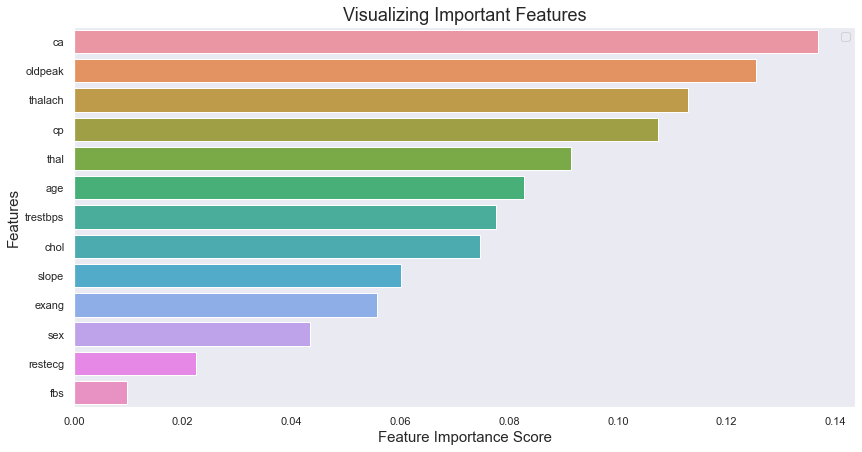

In [234]:
from matplotlib import pyplot

# Creating a bar plot
fig, ax = pyplot.subplots(figsize=(14, 7))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.title("Visualizing Important Features",fontsize=18)
plt.legend()
plt.show()

**Generating the Model on Selected Features**

Here, we can remove the last 4 features (fbs,restecg,sex,exang) since they have very low importance according to others, and select the rest of remaining features.

In [235]:
X_train.columns.values.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [236]:
# Split dataset into features and labels
RmX= df[['age','cp','trestbps','chol','thalach','oldpeak','slope','ca','thal']]  # Removed feature "sepal length"
Rmy= df['target']                         

# Split dataset into training set and test set
RmX_train, RmX_test, Rmy_train, Rmy_test = train_test_split(RmX, Rmy, test_size=0.20, random_state=5) # 80% training and 20% test

In [237]:
#Create a Gaussian Classifier
Rmclf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
Rmclf.fit(RmX_train,Rmy_train)

# prediction on test set
Rmy_pred=Rmclf.predict(RmX_test)


**Evaluate Model**

In [238]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Rmy_test, Rmy_pred))

Accuracy: 0.8360655737704918


Excellent!! The accuracy has increased to 0.836 from 0.770.

You can see that after removing the least important features, the accuracy increased. This is because we removed misleading data and noise. A lesser amount of features also reduces the training time.

**Let's see now the effects of finding the feature with normalized data**

First, normalizing the data by excluding must-removed columns.

In [239]:
b = df.target.values
a_data = df.drop(['target'], axis = 1)

# Normalize
a = (a_data - np.min(a_data)) / (np.max(a_data) - np.min(a_data)).values

In [240]:
# Normalize
RCNormFF = (RmX - np.min(RmX)) / (np.max(RmX) - np.min(RmX)).values

In [241]:
RCNormX_train, RCNormX_test, RCNormY_train, RCNormY_test = train_test_split(RCNormFF, Rmy, test_size = 0.2)

In [242]:
# Create Decision Tree classifer object
clfRCNormFF = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfRCNormFF = clfRCNormFF.fit(RCNormX_train,RCNormY_train)

#Predict the response for test dataset
RCNormYFF_pred = clfRCNormFF.predict(RCNormX_test)

In [243]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(RCNormY_test, RCNormYFF_pred))

Accuracy: 0.7704918032786885


**Outcome**

As you see here, normalized data didn't have positive effect on the accuracy of generated model with selected features for Random Forest Classifer. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. 

For machine learning, every dataset does not require normalization. It is required only when features have different ranges. 

Since, we removed the features that have smaller affects, we already got rid of unneccessary features. That's way normalizing data might not work with this method.

### Creating the Tables

In [244]:
test_score = accuracy_score(y_test, clfRF.predict(X_test)) * 100
train_score = accuracy_score(y_train, clfRF.predict(X_train)) * 100

results_df_3 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.0,70.491803
1,Decision Tree Classifier with Normalized Data,100.0,78.688525
2,Random Forest Classifier,100.0,77.049180


In [245]:
test_score = accuracy_score(b_test, clfRFNorm.predict(a_test)) * 100
train_score = accuracy_score(b_train, clfRFNorm.predict(a_train)) * 100

results_df_4 = pd.DataFrame(data=[["Random Forest Classifier with Normalized Data", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.0,70.491803
1,Decision Tree Classifier with Normalized Data,100.0,78.688525
2,Random Forest Classifier,100.0,77.049180
3,Random Forest Classifier with Normalized Data,100.0,86.885246


In [246]:
test_score = accuracy_score(Rmy_test, Rmclf.predict(RmX_test)) * 100
train_score = accuracy_score(Rmy_train, Rmclf.predict(RmX_train)) * 100

# (FIF: Finding Important Features)

results_df_5 = pd.DataFrame(data=[["Random Forest Classifier with FIF", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.0,70.491803
1,Decision Tree Classifier with Normalized Data,100.0,78.688525
2,Random Forest Classifier,100.0,77.049180
3,Random Forest Classifier with Normalized Data,100.0,86.885246
4,Random Forest Classifier with FIF,100.0,83.606557


In [247]:
test_score = accuracy_score(RCNormY_test, clfRCNormFF.predict(RCNormX_test)) * 100
train_score = accuracy_score(RCNormY_train, clfRCNormFF.predict(RCNormX_train)) * 100

# (FIF: Finding Important Features)

results_df_6 = pd.DataFrame(data=[["Random Forest Classifier with FIF and Normalized Data", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.0,70.491803
1,Decision Tree Classifier with Normalized Data,100.0,78.688525
2,Random Forest Classifier,100.0,77.049180
3,Random Forest Classifier with Normalized Data,100.0,86.885246
4,Random Forest Classifier with FIF,100.0,83.606557
5,Random Forest Classifier with FIF and Normaliz...,100.0,77.049180


## Naive Bayes Classification

In [248]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [249]:
#Create a Gaussian Classifier
NBclf = GaussianNB()

# Train the model using the training sets
NBclf.fit(X_train,y_train)

#Predict Output
NBy_pred = NBclf.predict(X_test) # 0:Overcast, 2:Mild

In [250]:
NBy_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

**Evaluate Model**

In [251]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, NBy_pred))

Accuracy: 0.7704918032786885


**Confusion Matrix**

Accuracy: 0.7704918032786885


Confusion matrix for Naive Bayes, without normalization
[[23 10]
 [ 4 24]]
Normalized confusion matrix for Naive Bayes
[[0.6969697  0.3030303 ]
 [0.14285714 0.85714286]]


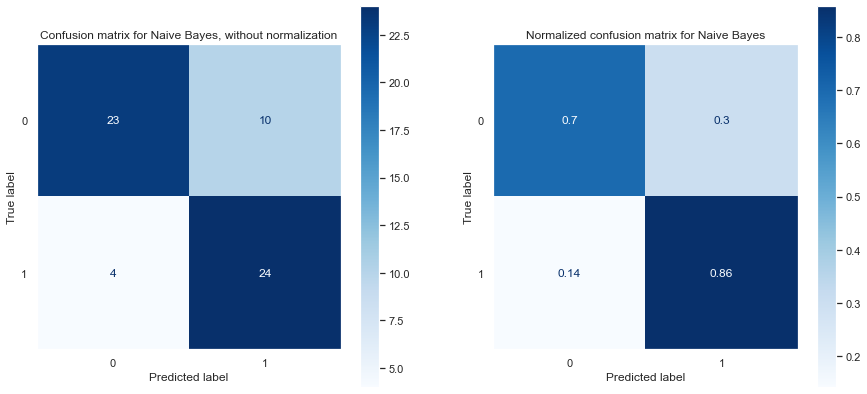

In [252]:
# Print Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, NBy_pred))
print('\n')

from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
plt.rcParams['axes.grid'] = False

titles_options = [("Confusion matrix for Naive Bayes, without normalization", None, axes.flatten()[0]),
                  ("Normalized confusion matrix for Naive Bayes", 'true', axes.flatten()[1])]

for title, normalize, ax in titles_options:
    
    disp = plot_confusion_matrix(NBclf, X_test, y_test, cmap=plt.cm.Blues, ax=ax, normalize = normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

**If we train model with the normalized data**

In [253]:
#Create a Gaussian Classifier
clfNBNorm=GaussianNB()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfNBNorm.fit(a_train,b_train)

NBy_predNorm=clfNBNorm.predict(a_test)

In [254]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(b_test, NBy_predNorm))

Accuracy: 0.9016393442622951


**Outcome**

As we see here, normalizing the data had a huge positive impact on the model accuracy, also having positive effects on both Decision Tree Classifier and Random Forest Classifier.

**Naive Bayes with the Finding Important Features**

In [255]:
#Create a Gaussian Classifier
clfNBFIF=GaussianNB()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfNBFIF.fit(RmX_train,Rmy_train)

NBFIFy_pred=clfNBFIF.predict(RmX_test)

In [256]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Rmy_test, NBFIFy_pred))

Accuracy: 0.819672131147541


### Creating Tables

In [257]:
test_score = accuracy_score(y_test, NBclf.predict(X_test)) * 100
train_score = accuracy_score(y_train, NBclf.predict(X_train)) * 100

# (FIF: Finding Important Features)

results_df_7 = pd.DataFrame(data=[["Naive Bayes Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_7, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.000000,70.491803
1,Decision Tree Classifier with Normalized Data,100.000000,78.688525
2,Random Forest Classifier,100.000000,77.049180
3,Random Forest Classifier with Normalized Data,100.000000,86.885246
4,Random Forest Classifier with FIF,100.000000,83.606557
5,Random Forest Classifier with FIF and Normaliz...,100.000000,77.049180
6,Naive Bayes Classifier,85.477178,77.049180


In [258]:
test_score = accuracy_score(b_test, clfNBNorm.predict(a_test)) * 100
train_score = accuracy_score(b_train, clfNBNorm.predict(a_train)) * 100

# (FIF: Finding Important Features)

results_df_8 = pd.DataFrame(data=[["Naive Bayes Classifier with Normalized Data", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_8, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.000000,70.491803
1,Decision Tree Classifier with Normalized Data,100.000000,78.688525
2,Random Forest Classifier,100.000000,77.049180
3,Random Forest Classifier with Normalized Data,100.000000,86.885246
4,Random Forest Classifier with FIF,100.000000,83.606557
5,Random Forest Classifier with FIF and Normaliz...,100.000000,77.049180
6,Naive Bayes Classifier,85.477178,77.049180
7,Naive Bayes Classifier with Normalized Data,82.572614,90.163934


In [259]:
test_score = accuracy_score(Rmy_test, clfNBFIF.predict(RmX_test)) * 100
train_score = accuracy_score(Rmy_train, clfNBFIF.predict(RmX_train)) * 100

# (FIF: Finding Important Features)

results_df_9 = pd.DataFrame(data=[["Naive Bayes Classifier with FIF", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_9, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.000000,70.491803
1,Decision Tree Classifier with Normalized Data,100.000000,78.688525
2,Random Forest Classifier,100.000000,77.049180
3,Random Forest Classifier with Normalized Data,100.000000,86.885246
4,Random Forest Classifier with FIF,100.000000,83.606557
5,Random Forest Classifier with FIF and Normaliz...,100.000000,77.049180
6,Naive Bayes Classifier,85.477178,77.049180
7,Naive Bayes Classifier with Normalized Data,82.572614,90.163934
8,Naive Bayes Classifier with FIF,84.232365,81.967213


# Conclusion

## Comparing The Models

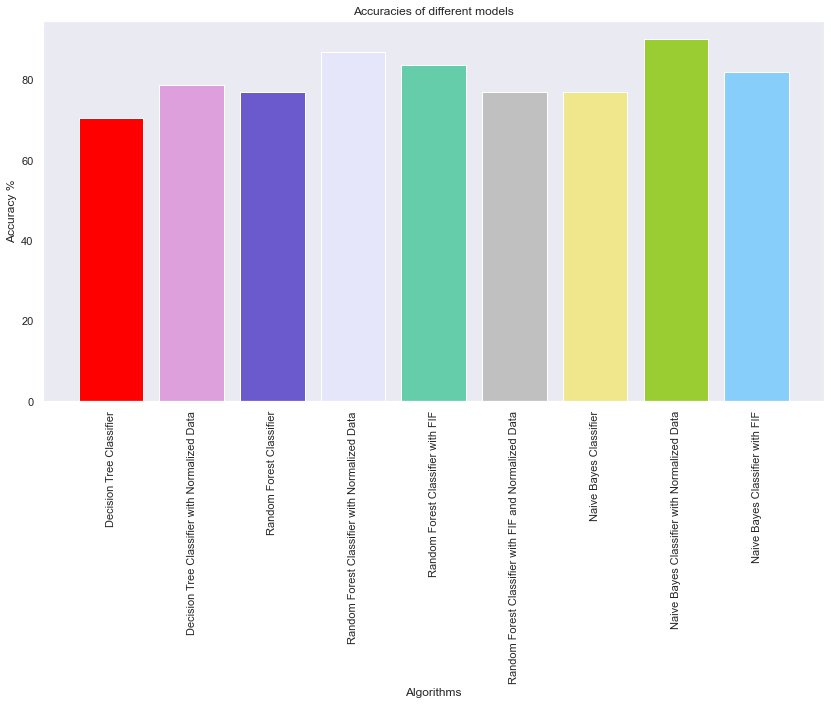

In [260]:
colors = ['red','plum','slateblue','lavender','mediumaquamarine','silver','khaki','yellowgreen','lightskyblue']
plt.figure(figsize=(14,7))
plt.title("Accuracies of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(results_df['Model'],results_df['Testing Accuracy %'], color = colors)
plt.xticks(rotation='vertical')

plt.show()

As we see here, the most effective algorithm to achieve highest accuracy is Naive Bayes with Normalized Data for the Heart Disease UCI dataset. Even the training accuracy in Naive Bayes algorithm is lower than the others, the test accuracy result interestingly is the highest one.

Again, I had smaller accuracy from Naive Bayes Classifier with FIF and Normalized Data result. Besides, since, I didn't have higher result from the Random Forest with Normalized Data and FIF, to prevent complicated looking, I excluded Naive Bayes Classifier with FIF and Normalized Data result from table. 

## How to Increase The Accuracy

### Normalizing The Data

Data Normalization is essentially a type of process wherein data is reorganized in such a way so that users can properly utilize it for further queries and analysis. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

As you see, almost in all methods Normalization Method had huge impacts on the accuracies. Therefore, using this method would be beneficial most of the time.

In [261]:
# Again the table;
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.000000,70.491803
1,Decision Tree Classifier with Normalized Data,100.000000,78.688525
2,Random Forest Classifier,100.000000,77.049180
3,Random Forest Classifier with Normalized Data,100.000000,86.885246
4,Random Forest Classifier with FIF,100.000000,83.606557
5,Random Forest Classifier with FIF and Normaliz...,100.000000,77.049180
6,Naive Bayes Classifier,85.477178,77.049180
7,Naive Bayes Classifier with Normalized Data,82.572614,90.163934
8,Naive Bayes Classifier with FIF,84.232365,81.967213


### Ensembling

In order to increase the accuracy of the model we can use ensembling technique. The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability/robustness over a single estimator.

There are two types of ensembling methods:
- Averaging Methods: The driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.
- Boosting Methods: Base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

We already used one Ensemble Averaging Method, Random Forest. Therefore, we will continue with the other ones. But, to prove ensemble method's positive effects, we can just check Random Forest Algorithm results.

**Gradient Tree Boosting**

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective procedure that can be used for both regression and classification problems.

In [262]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

clfGrdBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=0).fit(X_train, y_train)

clfGrdBoost.score(X_test, y_test)

0.7704918032786885

In [263]:
GrdBoosty_pred = clfGrdBoost.predict(X_test)

In [264]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, GrdBoosty_pred))

Accuracy: 0.7704918032786885


As you see, in Decision Tree algorithm accuracy was 70.492, and now increased to 77.049 ! 

**With normalized data**

Now let's try with the normalized data to see is GBDT still has positive effect.

In [265]:
clfGrdBoostNorm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=0).fit(a_train, b_train)

clfGrdBoostNorm.score(a_test, b_test)

0.8524590163934426

Great! The accuracy of Decision Tree Classifier with Normalized Data was 78.688525, and now it increased to 85.2459! 

Besides, it has increased accuracy more than Random Forest method. 

(Random Forest Classifier: 77.049, Random Forest Classifier with Normalized Data: 86.885)


There are much more other Ensemble Algorithms, I am just showing the ones on above.

### Finding Important Features and Removing the Least Important Ones

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:

- Better understanding the data.
- Better understanding a model.
- Reducing the number of input features.
- Reducing training time, fewer data points reduce algorithm complexity and algorithms train faster.
- Reducing overfitting, less redundant data means less opportunity to make decisions based on noise.
- Improving accuracy, less misleading data means modeling accuracy improves.


As we saw from above, FIF is very effective method to increase the accuracy. Again, I am showing the table.

In [266]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.000000,70.491803
1,Decision Tree Classifier with Normalized Data,100.000000,78.688525
2,Random Forest Classifier,100.000000,77.049180
3,Random Forest Classifier with Normalized Data,100.000000,86.885246
4,Random Forest Classifier with FIF,100.000000,83.606557
5,Random Forest Classifier with FIF and Normaliz...,100.000000,77.049180
6,Naive Bayes Classifier,85.477178,77.049180
7,Naive Bayes Classifier with Normalized Data,82.572614,90.163934
8,Naive Bayes Classifier with FIF,84.232365,81.967213


According to the results, FIF were very effective on both algorithms. However, we can say that, it doesn't go very well with the normalized data.

### Hyperparameter Tuning

To see Hyperparameter Tuning effects, we will tune the hyperparameters of Random forest model. The hyperparameters that we will tune includes max_features and the n_estimators.

In [267]:
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

RanFrstCls = RandomForestClassifier()

gridSCV = GridSearchCV(estimator=RanFrstCls, param_grid=param_grid, cv=5)

In [268]:
gridSCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

The GridSearchCV() function from scikit-learn is used to perform the hyperparameter tuning. Particularly, GridSearchCV() function can perform the typical functions of a classifier such as fit, score and predict as well as predict_proba, decision_function, transform and inverse_transform.

Secondly, we define variables that are necessary input to the GridSearchCV() function.

In [269]:
print("The best parameters are %s with a score of %0.2f"% (gridSCV.best_params_, gridSCV.best_score_))

The best parameters are {'max_features': 1, 'n_estimators': 170} with a score of 0.86


Now we will see the grid search parameters and their results of accuracies to understand better.

In [270]:
import pandas as pd

grid_results = pd.concat([pd.DataFrame(gridSCV.cv_results_["params"]),
                          pd.DataFrame(gridSCV.cv_results_["mean_test_score"], 
                          columns=["Accuracy"])],axis=1)
grid_results.head(25)

,max_features,n_estimators,Accuracy
0,1,10,0.826105
1,1,20,0.834524
2,1,30,0.834354
3,1,40,0.830357
4,1,50,0.817857
5,1,60,0.834184
6,1,70,0.834439
7,1,80,0.842772
8,1,90,0.834524
9,1,100,0.859269


Now we will have to reshape the data into a compatible format that will be recognized by the contour plot functions.

Firstly, we will segment the data into groups based on the 2 hyperparameters; max_features and n_estimators.

In [271]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.826105
             20            0.834524
             30            0.834354
             40            0.830357
             50            0.817857
...                             ...
5            160           0.817772
             170           0.822024
             180           0.822024
             190           0.809524
             200           0.821939

[100 rows x 1 columns]

Data is reshaped by pivoting the data into an m by n matrix where rows and columns correspond to the max_features and n_estimators, respectively.


In [272]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.826105  0.834524  0.834354  0.830357  0.817857  0.834184   
2             0.817857  0.834354  0.826105  0.826361  0.830272  0.834439   
3             0.788605  0.813690  0.817687  0.813690  0.818027  0.817772   
4             0.797364  0.830272  0.826105  0.817857  0.805357  0.817772   
5             0.801190  0.826190  0.809439  0.817857  0.813690  0.813605   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.834439  0.842772  0.834524  0.859269  0.846854  0.851020   
2             0.805357  0.821939  0.826190  0.838690  0.834524  0.830357   
3             0.826105  0.817857  0.817857  0.834439  0.838605  0.826190   
4             0.826105  0.813690  0.826190  0.826190  0.821939  0.822024   
5             0.826105  0.817772  0.809524  0.809354  0.830272  0.826105   

                                                                          \
n_estimators       130       140       150       160       170       180   
max_features                                                               
1             0.834439  0.846939  0.855102  0.855102  0.859354  0.842772   
2             0.834439  0.834524  0.830357  0.842857  0.838520  0.838605   
3             0.817772  0.838605  0.834439  0.830357  0.826276  0.830272   
4             0.817772  0.813776  0.822024  0.826190  0.821939  0.813690   
5             0.822024  0.826105  0.830357  0.817772  0.822024  0.822024   

                                  
n_estimators       190       200  
max_features                      
1             0.842687  0.846854  
2             0.834354  0.842857  
3             0.817942  0.842772  
4             0.822024  0.813690  
5             0.809524  0.821939

Finally, we assign the pivoted data into the respective x, y and z variables.


In [273]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

Now, we will be visualizing the landscape of the 2 hyperparameters that we are tuning and their influence on the accuracy score with some impressive graphs


In [274]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [275]:
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

**Outcome**

As you see, with tuning hyperparameter for Random Forest Algorithm, the accuracy has increased to 85.9439 from 80.327869. 

This is the highest accuracy among all the Random Forest Classification methods that we tried!!

**Now let's try tuning hyperparameter of the Random Forest Algorithm with FIF**

Normal Random Forest Classifier with FIF

In [276]:
#Create a Gaussian Classifier
Rmclf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
Rmclf.fit(RmX_train,Rmy_train)

# prediction on test set
Rmy_pred=Rmclf.predict(RmX_test)


In [277]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Rmy_test, Rmy_pred))

Accuracy: 0.8360655737704918


Tuning Hyperparameter of Random Forest Classifier with FIF

In [278]:
gridSCV.fit(RmX_train, Rmy_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [279]:
print("The best parameters are %s with a score of %0.4f"% (gridSCV.best_params_, gridSCV.best_score_))

The best parameters are {'max_features': 1, 'n_estimators': 40} with a score of 0.8214


The result from Random Forest Classifier with FIF was 83.60655737704918, but now with tuning hyperparameter, it gave the lower result. I believe max_features is more than 5.


# Results

As we trained 3 algorithms with Heart Disease UCI dataset, we achieved so many different accuracies. 

As long as we searched, the best accuracy so far is the Naive Bayes Classifier Algorithm with Normalized Data (90.1634) 

The second highest accuracy is the Random Forest Algorithm with Tuned Hyperparameters (85.9354)

And, the third highest accuracy is the Gradient Tree Boosting Algorithm from Ensembling methods. (85.2459)

Lastly, the fourth highest accuracy is the Random Forest Classifier with Finding Important Features method. (83.6065)

In this assessment, I tried; finding important features, ensembling, hyperparameter tuning and normalizing the data  to see how they are effecting the accuracies. There are many more methods out there that we can make changes on data before training or models.

From the informations above, we can conclude that all algorithms that we tried achieved higher accuracies with the additional algorithms and methods. All efficiencies of methods and algorithms are changing according to the data and which classifier that built on. 

**Thank you very much for your readings!**

# References

https://scikit-learn.org/stable/modules/ensemble.html

https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://github.com/dataprofessor/code/blob/master/python

https://www.datacamp.com/community/tutorials/ 
